# Memory Stroop Colour Naming Task

## Table of Contents
### &ensp;&ensp; 1. [Introduction](#1.)
### &ensp;&ensp; 2. [Aim](#2.)
### &ensp;&ensp; 3. [Method](#3.)
### &ensp;&ensp; 4. [Data Cleaning](#4.)
### &ensp;&ensp; 5. [Data Analysis and Results](#5.)
### &ensp;&ensp; 6. [Key Findings and Conclusion](#6.)
<span style="color:black;font-size:15px">
<p>*If any image does not show properly, please right-click the image to re-load it.</p>

<span style="color:black;font-size:17px">
<h3>Abstract</h3>
<p><li>The <b>Stroop colour naming task</b> has been widely used to investigate the mechanisms underlying <b>attentional bias</b>, it has also been used to examine <b>implicit memory</b>.</li></p>
<p><li>Using the study-test procedure <b>60 native English speakers</b> were tested to determine whether <b>study effects from neutral words</b> that had previously been studied would cause interference in colour naming.</li></p> 
<p><li>The results showed that studied words had a tendency to slow down the <b>studied block</b> consisting of both studied and unstudied words compared to the <b>unstudied block</b> comprising of unstudied words only. The study effect was strong in the 1st half of the experiment and it diminished in the 2nd half of the experiment <span style="color:blue">(See below Dashboard created in Tableau)</span>.</li></p>

<span style="color:black;font-size:17px">
<h3>Dashboard</h3>
<img src='https://drive.google.com/uc?export=view&id=1V5CRWGpvh8gL0QNK1x00XwBnuIkuYyMy' width=1000 height=1000></img>
<span style="color:black;font-size:15px">

<span style="color:black;font-size:17px">
<h4>Import the necessary libraries and packages</h4>

In [1]:
# import 'pandas' and 'numpy' for the manipulation of dataframe
import pandas as pd
import numpy as np

# import 'pingouin' for running statistical methods
import pingouin as pg

# import 'seaborn' and 'matplotlib' for creating data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# To display all of the columns and rows
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

<span style="color:black;font-size:17px">
<h3>1.</h3><h3>Introduction</h3>
<p><span style="background-color:yellow">This section introduces the Stroop colour naming task and its modified versions.</span></p>

<span style="color:black;font-size:17px">
<h4>Stroop Task using colour words</h4>

<span style="color:black;font-size:17px">
<p>In cognitive psychology, the <b>Stroop colour naming task</b> has been widely used to investigate selective attention.</p>
<p>In the task, participants are presented with a set of words printed in colour, and the goal is to <b>name the ink colour as soon as possible while ignoring the meaning of the word</b>.</p>
<p>When the ink colour doesn't match the meaning of the word <span style="color:blue">(try below column 4)</span>, you'd likely take longer to name the ink colour (and be more likely to get it wrong) than when the ink colour matches the word <span style="color:blue">(try below column 2)</span>.</p>
<img src='https://drive.google.com/uc?export=view&id=1NAd1VwexJFFItLQF6wPOio8QMXmJqHdY' width=500 height=500></img>


<span style="color:black;font-size:17px">
<h4>Stroop Task using using non-colour words with the Study-Test procedure</h4>

<span style="color:black;font-size:17px">
<p>Researchers have found that by using <b>the Study-Test procedure in a <span style="background-color:yellow">trial-by-trial format</span></b>, <b>a study item immediately followed by a test item</b>, participants showed a slowdown in colour naming when they responded to the non-colour words they have recently studied.</p>
<p>For example <span style="color:blue">(See below left panel)</span>, when you are given a set of 3 dog's breed-related words (Chihuahua, Husky, Bulldog) to study, then you are asked to name the ink colour of a test item. You are more likely to be slower when responding to the studied word '<span style="color:red">Chihuahua</span>' compared to the unstudied word '<span style="color:lightgreen">textbook</span>', which is a result of 'Study Effect'.</p>
<img src='https://drive.google.com/uc?export=view&id=1BxnobdhWCiXi9Oz1P-kD2pdopl_vxTBl' width=1350 height=1350></img> 
    
<p>Following the above research, an American psychologist, MacLeod, was curious whether this 'Study Effect' can still survive if the time gap between the 'Study' item and the 'Test' item becomes longer.</p>
<p>So, he applied <b>the Study-Test procedure in a <span style="background-color:yellow">block-by-block format</span></b> to his experimental design. That is, participants studied a block of 12 neutral words (e.g., table, class, door...etc.), and then had a block of colour naming task which contained a mixture of the 12 studied and 12 unstudied words <span style="color:blue">(See above right panel)</span>.</p>  
<p>However, the result of MacLeod's research did not show any study effect where <b>RT to Studied words did not differ from RT to Unstudied words</b>.</p>

<span style="color:black;font-size:17px">
<h3>2.</h3><h3>Aim</h3>
<p><span style="background-color:yellow">This section explains the purpose of this research project, and the questions this project aimed to solve.</span></p>

<span style="color:black;font-size:17px">
<p><b>Rationale:</b> This research project <b>argued that studying words can affect naming colours</b> during the blocked format colour naming task. Therefore, in MacLeod's experiment, it was possible the study effect occurred in the test block. But because MacLeod's design did not include <b>a baseline block to compared with the test block</b>, it was not possible to reveal the study effect.</p>
<p><b>Experimental Design:</b> This research project attempted to replicate MacLeod's design where there is a Study block followed by a Test block containing a mixture of Studied and Unstudied words <b>(Mixed block)</b>. In addition, an extra Test block consisting of only Unstudied words <b>(Pure block)</b> was added to serve as a baseline <span style="color:blue">(See below Figure)</span>.</p>
<p><b>Questions to solve:</b></p>
         <ul>
            <p><li>Within the Mixed block:</li></p>
               <ul>
                   <p><li>Is RT to the Studied words = RT to the Unstudied words, which is like what MacLeod found?</li></p>
               </ul>
            <p><li>Between the Mixed and Pure blocks:</li></p>
               <ul>
                   <p><li>Is RT to the Mixed block > RT to the baseline Pure block?</li></p>
                   <p><li>Is RT to Unstudied-Mixed > RT to Unstudied-Pure?</li></p>
               </ul>
            <p><li>If the study effect occurs in the Mixed block, does the amount of effect remain the same through the entire block?</li></p>
         </ul>
<p><b>Hypothesis:</b> <span style="color:blue">(See below Figure)</span></p>
    
<img src='https://drive.google.com/uc?export=view&id=1jdykGQHszwYm4y7QOcAB2Hn8SYGd42R8' width=950 height=950></img>

<span style="color:black;font-size:17px">
<h3>3.</h3><h3>Method</h3>
<p><span style="background-color:yellow">This section demonstrates the information of the participants and the experiment.</span></p>

<span style="color:black;font-size:17px">
<h4>The Composition of Participants</h4>

<span style="color:black;font-size:17px">
<ul>
                   <p><li><b>60</b> native English-speaking students from the University of Kent
took part in the study for course credit.</li></p>
                   <p><li> The sample comprised <b>50 female</b> and <b>10 male</b> students aged 18–52, with a <b>mean age of 20.98
(SD = 5.27)</b>.</li></p>
</ul>

In [2]:
# Read the excel file into a dataframe
df = pd.read_excel('Subject.xlsx')
print(df.head())
print()
# Check the summary of the 'Age' column
print(df['Age'].describe())
print()
# Check the count for each unique element in the 'Gender' column
print(df['Gender'].value_counts())

   Subject  Age  Gender
0        1   18  Female
1        2   26    Male
2        3   19  Female
3        4   20  Female
4        5   18  Female

count    60.000000
mean     20.983333
std       5.270615
min      18.000000
25%      19.000000
50%      19.000000
75%      21.000000
max      52.000000
Name: Age, dtype: float64

Female    50
Male      10
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Percentage of Participants by Gender')

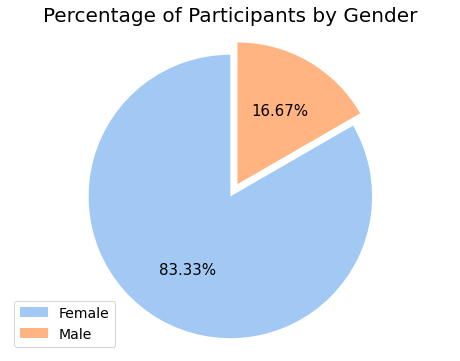

In [3]:
# Create a Pie chart to show the proportion of participants by Gender
colors = sns.color_palette('pastel')
explode_list = [0.1, 0]

df['Gender'].value_counts().plot(kind='pie',
                                 labels=None,
                                 figsize=(8, 6),
                                 fontsize=15,
                                 autopct='%.2f%%', 
                                 colors=colors,
                                 startangle=90,
                                 explode=explode_list)
plt.legend(labels=df['Gender'], loc="lower left", fontsize=14)
plt.axis('equal')
plt.ylabel('')
plt.title('Percentage of Participants by Gender', fontsize = 20)

Text(0.5, 1.0, 'The Count Distribution of Participants by Age')

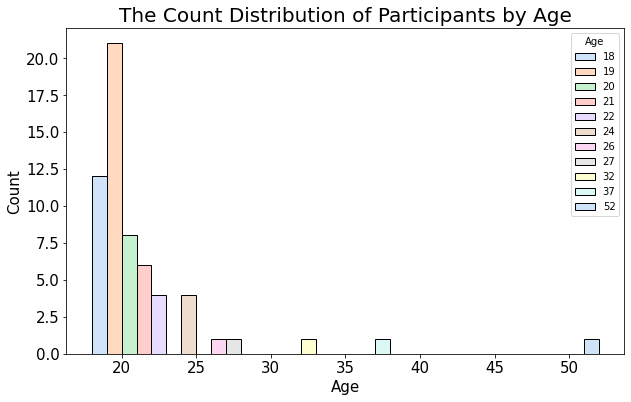

In [4]:
# Create a Histogram to display the count distribution of participants by Age
plt.figure(figsize=(10, 6))
sns.histplot(data = df, 
             x='Age', 
             hue='Age', 
             palette='pastel')

plt.xlabel('Age', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.yticks(fontsize=15)

plt.title('The Count Distribution of Participants by Age', fontsize=20)

<span style="color:black;font-size:17px">
<h4>Experimental Design</h4>
<span style="color:black;font-size:17px">
<ul>
                   <p><li>A single factorial design was employed with <b>Word type (Studied-mixed, Unstudied-mixed, Unstudied-pure)</b> as the within-subject factor.</li></p>
                   <p><li>The dependent variable was the <b>mean correct reaction time</b> to name the ink colours the words were printed in.</li></p>
</ul>

<span style="color:black;font-size:17px">
<h4>Apparatus and materials</h4>
<span style="color:black;font-size:17px">
         <ul>
            <p><li>Apparatus:</li></p>
               <ul>
                   <p><li>The experiment program was written in E-Prime 2.0 (Psychology Software Tools) and presented on a 60 cm Dell widescreen monitor. </li></p>
                   <p><li>Reaction time was measured during the colour naming tasks. </li></p>
                   <p><li>The manual responses, the presentation and randomisation of the words were controlled by E-Prime 2.0.</li></p>
               </ul>
            <p><li>Marterials:</li></p>
               <ul>
                   <p><li><b>100 neutral words</b> were chosen from the English Lexicon Project and were divided into ﬁve lists of 20 words.</li></p>
                   <p><li>Each word set contained an equal number of 4, 5, 6 and 7 letter words and were matched for word frequency.</li></p>
               </ul>
<img src='https://drive.google.com/uc?export=view&id=1Gm5QcnPTj5z0LqFmlYArKCC048eQovjx' width=600 height=600></img>

<span style="color:black;font-size:17px">
<h4>Procedure</h4>
<span style="color:black;font-size:17px">
<ul>
                   <p><li>Each participant was given an information sheet and a consent form to sign upon arriving at the lab.</li></p>
                   <p><li>The participant was asked to read the instructions on the computer screen.</li></p>
                   <p><li>The experiment comprised two phases: the study phase and test phase.</li></p>
                   <ul>
                       <p><li><b>Study phase:</b> Each participant was shown 20 words one at a time and asked to do their best to memorise them for a later memory test.</li></p>
                       <p><li><b>Test phase:</b> There were 2 test blocks containing 320 trials in total. Participants were presented with <b>one word printed in colour on each trial</b>, and asked to <b>ignore the word and respond to ink colour as quickly and as accurately as possible</b>.</li></p>
                   </ul>

<span style="color:black;font-size:17px">
<h3>4.</h3><h3>Data Cleaning</h3>
<p><span style="background-color:yellow">This section presents the flow of preparing the dataset for the analysis.</span></p>

<span style="color:black;font-size:17px">
<p>Once each participant completed the experiment, their data was stored in a CSV file. 60 CSV files were merged into 'Raw_data.csv', which contains <b>76 columns</b> in total. The data was then filtered down to <b>12 columns</b> that were necessary to create the dataset for aggregation.</p>
<p>At the end, the dataset was aggregated to <b>6 columns</b> for the analysis:
<ul>
    <p><li><b>Subject:</b> Each participant is recorded with a subject number.</li></p>
    <p><li><b>ACC:</b> The accuracy for each trail. The value '1' refers to correct response, whereas '0' refers to incorrect response.</li></p>
    <p><li><b>Error:</b> The error for each trail. Opposite to ACC.</li></p>
    <p><li><b>Mean Correct Reaction Times (ms):</b> Participants' reaction time to the trials where they correctly identified the ink colour.</li></p>
    <ul>
        <p><li>The very 1st trial of each Test block will be removed since normally it takes longer time to respond at the beginning of the experiment.</li></p>       
        <p><li>Trials with reaction times faster than 300ms or slower than 3,000ms will be removed.</li></p>
    </ul>
    <p><li><b>Word Type:</b> 3 word types - Studied-mixed, Unstudied-mixed, and Unstudied-pure.</li></p>
    <p><li><b>Trial_2bins/Block Half:</b> If the Study effect occurred, I will look into 1st half & 2nd half of each Test block to see.</li></p>
<ul>

In [5]:
# Read the csv file into a DataFrame
path = 'Raw_data.csv'
df = pd.read_csv(path)
df.head()

,ExperimentName,Subject,Session,Clock.Information,DataFile.Basename,Display.RefreshRate,ExperimentVersion,Group,RandomSeed,RuntimeVersion,RuntimeVersionExpected,SessionDate,SessionStartDateTimeUtc,SessionTime,StudioVersion,Block,Colour,ColourList,CorrectLetter,Grading.ACC,Grading.CRESP,Grading.DurationError,Grading.OnsetDelay,Grading.OnsetTime,Grading.OnsetToOnsetTime,Grading.RESP,Grading.RT,Grading.RTTime,Phase1List,Phase1List.Cycle,Phase1List.Sample,Phase2aList,Phase2aList.Cycle,Phase2aList.Sample,Phase2aStroop.ACC,Phase2aStroop.CRESP,Phase2aStroop.DurationError,Phase2aStroop.OnsetDelay,Phase2aStroop.OnsetTime,Phase2aStroop.OnsetToOnsetTime,Phase2aStroop.RESP,Phase2aStroop.RT,Phase2aStroop.RTTime,Phase2bList,Phase2bList.Cycle,Phase2bList.Sample,Phase2bStroop.ACC,Phase2bStroop.CRESP,Phase2bStroop.DurationError,Phase2bStroop.OnsetDelay,Phase2bStroop.OnsetTime,Phase2bStroop.OnsetToOnsetTime,Phase2bStroop.RESP,Phase2bStroop.RT,Phase2bStroop.RTTime,Phase3Display.ACC,Phase3Display.CRESP,Phase3Display.DurationError,Phase3Display.OnsetDelay,Phase3Display.OnsetTime,Phase3Display.OnsetToOnsetTime,Phase3Display.RESP,Phase3Display.RT,Phase3Display.RTTime,Phase3List,Phase3List.Cycle,Phase3List.Sample,PracticeRun,PracticeRun.Cycle,PracticeRun.Sample,Procedure,Running,Seen,Word,Word_Group,Word_List
0,experiment,1,3,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",experiment-1-3,59.94,1.0.0.388,1,811482784,2.0.10.242,2.0.10.242,41792,3/6/2014 12:05:29,12:05:29,2.0.10.147,241,blue,,n,,,,,,,,,,,,,,,,,,,,,,,,,1,2,1,1,n,-999999,1,514847,0,n,689,515536,,,,,,,,,,,,,,,,Stroop2nd,Phase2bList,,issue,n2,a
1,experiment,1,3,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",experiment-1-3,59.94,1.0.0.388,1,811482784,2.0.10.242,2.0.10.242,41792,3/6/2014 12:05:29,12:05:29,2.0.10.147,242,yellow,,m,,,,,,,,,,,,,,,,,,,,,,,,,2,2,2,1,m,-999999,1,516549,0,m,499,517048,,,,,,,,,,,,,,,,Stroop2nd,Phase2bList,,design,n2,a
2,experiment,1,3,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",experiment-1-3,59.94,1.0.0.388,1,811482784,2.0.10.242,2.0.10.242,41792,3/6/2014 12:05:29,12:05:29,2.0.10.147,243,yellow,,m,,,,,,,,,,,,,,,,,,,,,,,,,3,2,3,1,m,-999999,1,518067,0,m,501,518568,,,,,,,,,,,,,,,,Stroop2nd,Phase2bList,,cover,n2,a
3,experiment,1,3,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",experiment-1-3,59.94,1.0.0.388,1,811482784,2.0.10.242,2.0.10.242,41792,3/6/2014 12:05:29,12:05:29,2.0.10.147,244,blue,,n,,,,,,,,,,,,,,,,,,,,,,,,,4,2,4,1,n,-999999,1,519585,0,n,879,520464,,,,,,,,,,,,,,,,Stroop2nd,Phase2bList,,playing,n3,b
4,experiment,1,3,"<?xml version=""1.0""?>\n<Clock xmlns:dt=""urn:sc...",experiment-1-3,59.94,1.0.0.388,1,811482784,2.0.10.242,2.0.10.242,41792,3/6/2014 12:05:29,12:05:29,2.0.10.147,245,green,,x,,,,,,,,,,,,,,,,,,,,,,,,,5,2,5,1,x,-999999,1,521487,0,x,353,521840,,,,,,,,,,,,,,,,Stroop2nd,Phase2bList,,section,n2,a


In [6]:
# There are 76 columnss in total.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 76 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ExperimentName                  19200 non-null  object 
 1   Subject                         19200 non-null  int64  
 2   Session                         19200 non-null  int64  
 3   Clock.Information               19200 non-null  object 
 4   DataFile.Basename               19200 non-null  object 
 5   Display.RefreshRate             19200 non-null  float64
 6   ExperimentVersion               19200 non-null  object 
 7   Group                           19200 non-null  int64  
 8   RandomSeed                      19200 non-null  int64  
 9   RuntimeVersion                  19200 non-null  object 
 10  RuntimeVersionExpected          19200 non-null  object 
 11  SessionDate                     19200 non-null  object 
 12  SessionStartDateTimeUtc         

<span style="color:black;font-size:17px">
<h4>Filter the data that we are interested in from 76 columns to 12 columns</h4>

In [7]:
df = df[["Subject", "Colour", "CorrectLetter", "Word_Group",
         "Phase2aList", "Phase2aStroop.ACC", "Phase2aStroop.CRESP", "Phase2aStroop.RT", 
         "Phase2bList", "Phase2bStroop.ACC", "Phase2bStroop.CRESP", "Phase2bStroop.RT"]]

In [8]:
df.head()

,Subject,Colour,CorrectLetter,Word_Group,Phase2aList,Phase2aStroop.ACC,Phase2aStroop.CRESP,Phase2aStroop.RT,Phase2bList,Phase2bStroop.ACC,Phase2bStroop.CRESP,Phase2bStroop.RT
0,1,blue,n,n2,,,,,1,1,n,689
1,1,yellow,m,n2,,,,,2,1,m,499
2,1,yellow,m,n2,,,,,3,1,m,501
3,1,blue,n,n3,,,,,4,1,n,879
4,1,green,x,n2,,,,,5,1,x,353


<span style="color:black;font-size:17px">
<h4>Add a column called 'RT' which stands for Reaction Time</h4>

In [9]:
# Add a column called 'RT' which stands for Reaction Time. This combines the reaction times of 1st_block and 2nd_block into one column.
df['RT'] = df['Phase2aStroop.RT'] + df['Phase2bStroop.RT']
# Change the column type to float, otherwise it will be treated as string
df['RT'] = df['RT'].astype(float)

<span style="color:black;font-size:17px">
<h4>Add a column called 'ACC' and a column called 'Error', indicating the accuracy and error of each trial</h4>

In [10]:
# Add a column called 'ACC', which stands for Accuracy. This combines the accuracy of 1st_block and 2nd_block into one column.
df['ACC'] = df['Phase2aStroop.ACC'] + df['Phase2bStroop.ACC']
# Change the column type to int, otherwise it will be treated as string
df['ACC'] = df['ACC'].astype(int)

In [11]:
# Add a column called 'Error', which is converted from the column 'ACC'.
df['Error'] = df['ACC'].replace(to_replace={1:0, 0:1})

In [12]:
df.head()
# use replace() to rename the elements of WordGroup(old, n1, n2, n3, n4) to (new_blocked, new_mixed, old_mixed)

,Subject,Colour,CorrectLetter,Word_Group,Phase2aList,Phase2aStroop.ACC,Phase2aStroop.CRESP,Phase2aStroop.RT,Phase2bList,Phase2bStroop.ACC,Phase2bStroop.CRESP,Phase2bStroop.RT,RT,ACC,Error
0,1,blue,n,n2,,,,,1,1,n,689,689.0,1,0
1,1,yellow,m,n2,,,,,2,1,m,499,499.0,1,0
2,1,yellow,m,n2,,,,,3,1,m,501,501.0,1,0
3,1,blue,n,n3,,,,,4,1,n,879,879.0,1,0
4,1,green,x,n2,,,,,5,1,x,353,353.0,1,0


In [13]:
# Check the accuracy rate of each participant
df_accuracy = df[['Subject', 'ACC']]
df_accuracy_grp = df_accuracy.groupby(['Subject']).mean()
df_accuracy_grp.reset_index(inplace=True)
df_accuracy_grp[df_accuracy_grp['ACC'] < 0.80]

,Subject,ACC
56,57,0.778125


<span style="color:black;font-size:17px">
Participant <b>No. 57</b> had an accuracy rate (77.81%) lower than 80%, who will need to be <b>excluded from the analysis</b> later on.

<span style="color:black;font-size:17px">
<h4>Add a column called 'RTc', which stands for Correct Reaction Time</h4>

In [14]:
# Add a column called 'RTc', which stands for Correct Reaction Time because we are only interested in the reaction times on correct responses
# Use numpy.where(condition, True, False) to add a new column under a condition
df['RTc'] = np.where(df['ACC'] != 0, df['RT'], np.NaN)

<span style="color:black;font-size:17px">
<h4>Add a column called 'Trial_Number' to track the sequence of the trials</h4>

In [15]:
df['Trial_Number'] = df['Phase2aList'] + df['Phase2bList']
df['Trial_Number'] = df['Trial_Number'].astype(int)

<span style="color:black;font-size:17px">
<h4>Add a new column called 'RTc_outlier', which removes</h4>
<span style="color:black;font-size:17px">
<ul>
    <p><li>The 1st trial of each block, and</li></p>
    <p><li>Trials that are faster than 300ms or slower than 3000ms.</li></p>
</ul>

In [16]:
df['RTc_Outlier'] = np.where((df['Trial_Number'] != 1) & (df['RTc'] > 300) & (df['RTc'] < 3000), df['RTc'], np.NaN)

<span style="color:black;font-size:17px">
<h4>Bin the column 'TrialNumber' into two groups - 1st Half and 2nd Half</h4>
<span style="color:black;font-size:17px">
<ul>
    <p><li>Use the numpy.linspace(start_value, end_value, number_of_divider) function</li></p>
    <p><li>Use the pandas.cut(x, bins, labels, include_lowest = True, right = True) function</li></p>
    <p><li>1st Half: TrialNumber between 1 and 80</li></p>
    <p><li>2nd Half: TrialNumber between 81 and 160</li></p>
</ul>

In [17]:
bins = np.linspace(min(df['Trial_Number']), max(df['Trial_Number']), 3)
group_names = ['1st Half', '2nd Half']
df['Trial_2bins'] = pd.cut(df['Trial_Number'], bins, labels=group_names, include_lowest=True, right=True)

<span style="color:black;font-size:17px">
<h4>Transform the WordGroup into 3 word types</h4>
<span style="color:black;font-size:17px">
<ul>
    <p><li>Use the dataframe.replace('old_value', 'new_value')</li></p>
</ul>

In [18]:
df['Word_Type'] = df['Word_Group'].replace(to_replace={'old':'Studied-mixed', 'n1':'Unstudied-mixed', 'n2':'Unstudied-pure', 'n3':'Unstudied-pure'})
# Check the count of each Word Type
df[['Word_Type']].value_counts()

Word_Type      
Unstudied-pure     9600
Studied-mixed      4800
Unstudied-mixed    4800
dtype: int64

<span style="color:black;font-size:17px">
<h4>The Data is ready for Aggregation</h4>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19200 entries, 0 to 19199
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Subject              19200 non-null  int64   
 1   Colour               19200 non-null  object  
 2   CorrectLetter        19200 non-null  object  
 3   Word_Group           19200 non-null  object  
 4   Phase2aList          19200 non-null  object  
 5   Phase2aStroop.ACC    19200 non-null  object  
 6   Phase2aStroop.CRESP  19200 non-null  object  
 7   Phase2aStroop.RT     19200 non-null  object  
 8   Phase2bList          19200 non-null  object  
 9   Phase2bStroop.ACC    19200 non-null  object  
 10  Phase2bStroop.CRESP  19200 non-null  object  
 11  Phase2bStroop.RT     19200 non-null  object  
 12  RT                   19200 non-null  float64 
 13  ACC                  19200 non-null  int32   
 14  Error                19200 non-null  int32   
 15  RTc                

In [20]:
# Save the dataframe into a CSV file
df.to_csv('Ready for Aggregation.csv')

In [21]:
# Columns for aggregation
df_aggr = df[['Subject', 'Word_Type', 'Trial_2bins', 'RTc_Outlier', 'ACC', 'Error']]
df_aggr_grp = df_aggr.groupby(['Subject', 'Word_Type', 'Trial_2bins']).mean()
df_aggr_grp.head(18)

RTc_Outlier       ACC     Error
Subject Word_Type       Trial_2bins                                 
1       Studied-mixed   1st Half      671.150000  0.911111  0.088889
                        2nd Half      562.612903  0.885714  0.114286
        Unstudied-mixed 1st Half      654.064516  0.885714  0.114286
                        2nd Half      702.707317  0.911111  0.088889
        Unstudied-pure  1st Half      509.544118  0.862500  0.137500
                        2nd Half      558.800000  0.875000  0.125000
2       Studied-mixed   1st Half      913.023256  0.977273  0.022727
                        2nd Half     1030.571429  0.972222  0.027778
        Unstudied-mixed 1st Half      838.542857  1.000000  0.000000
                        2nd Half      806.976744  0.977273  0.022727
        Unstudied-pure  1st Half      794.103896  0.987500  0.012500
                        2nd Half      891.562500  1.000000  0.000000
3       Studied-mixed   1st Half      743.777778  0.880952  0.119048
                        2nd Half      677.916667  0.947368  0.052632
        Unstudied-mixed 1st Half      753.447368  1.000000  0.000000
                        2nd Half      683.842105  0.904762  0.095238
        Unstudied-pure  1st Half      629.420290  0.925000  0.075000
                        2nd Half      633.902778  0.925000  0.075000

<span style="color:black;font-size:17px">
<h4>The Data now contains the required 6 columns and is now ready for Analysis</h4>

In [22]:
df_aggr_grp.head(6)

RTc_Outlier       ACC     Error
Subject Word_Type       Trial_2bins                                 
1       Studied-mixed   1st Half      671.150000  0.911111  0.088889
                        2nd Half      562.612903  0.885714  0.114286
        Unstudied-mixed 1st Half      654.064516  0.885714  0.114286
                        2nd Half      702.707317  0.911111  0.088889
        Unstudied-pure  1st Half      509.544118  0.862500  0.137500
                        2nd Half      558.800000  0.875000  0.125000

In [23]:
df_aggr_grp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 360 entries, (1, 'Studied-mixed', '1st Half') to (60, 'Unstudied-pure', '2nd Half')
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RTc_Outlier  360 non-null    float64
 1   ACC          360 non-null    float64
 2   Error        360 non-null    float64
dtypes: float64(3)
memory usage: 10.3+ KB


In [24]:
# Save the aggregated data into a CSV file
df_aggr_grp.to_csv('Aggred by Subject, Word_Type, Trial_2bins.csv')

<span style="color:black;font-size:17px">
<h3>5.</h3><h3>Data Analysis and Results</h3>
<p><span style="background-color:yellow">This section illustrates the analysis of the data using statistical methods.</span></p>

<span style="color:black;font-size:17px">
<h4>Analysis of Variance (ANOVA)</h4>

<span style="color:black;font-size:17px">
<p>In this section, ANOVA will be used to examine whether there is any difference in participants' reaction time to colour between <b>three word types (Studied-mixed, Unstudied-mixed, Unstudied-pure)</b>, and if the difference exists, we then look into the data by <b>Trial_2bins/Block Half (1st half, 2nd half)</b> to see whether the pattern of the 1st half differs from that of the 2nd half.</p>

<p>What is ANOVA?</p>
<p><span style="background-color:yellow"><b>ANOVA</b> is a statistical test to analyse whether the means of three or more groups are different.</span></p>

<ul>
    <p>ANOVA produces 2 values:</p>
    <li><b>F-value</b> - ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-value.
         <ul>
            <p><li>A larger value means the difference between the means is larger.</li></p>
         </ul>
    <li><b>p-value</b> - A p-value is the probability when the null hypothesis is true for the F-values.</li>
         <ul>
             <p><li><b>The null hypothesis</b> assumes the means of all groups are equal.</li></p>
             <p><li>In general, when p-value < 0.05, we reject the null hypothesis because this means there is less than 5% chance that the null hypothesis is true.</li></p>
         </ul>
</ul>
    
<p>If ANOVA suggests a significant difference between three word types, <b>Paired Sample t-tests</b> will be used to compare the means of any two groups to see where the difference exists.</p>

<p>What is T-test?</p>
<p><span style="background-color:yellow"><b>T-test</b> is a statistical test to determine whether the means of two groups are different based on the <b>p-value</b> it produces.</span></p>

<span style="color:black;font-size:17px">
<h4>2-way Repeated Measures ANOVA</h4>

In [25]:
# Read the saved aggregated data into a dataframe
df_ANOVA = pd.read_csv('Aggred by Subject, Word_Type, Trial_2bins.csv')
df_ANOVA.head(12)

,Subject,Word_Type,Trial_2bins,RTc_Outlier,ACC,Error
0,1,Studied-mixed,1st Half,671.150000,0.911111,0.088889
1,1,Studied-mixed,2nd Half,562.612903,0.885714,0.114286
2,1,Unstudied-mixed,1st Half,654.064516,0.885714,0.114286
3,1,Unstudied-mixed,2nd Half,702.707317,0.911111,0.088889
4,1,Unstudied-pure,1st Half,509.544118,0.862500,0.137500
5,1,Unstudied-pure,2nd Half,558.800000,0.875000,0.125000
6,2,Studied-mixed,1st Half,913.023256,0.977273,0.022727
7,2,Studied-mixed,2nd Half,1030.571429,0.972222,0.027778
8,2,Unstudied-mixed,1st Half,838.542857,1.000000,0.000000
9,2,Unstudied-mixed,2nd Half,806.976744,0.977273,0.022727


<span style="color:black;font-size:17px">
<p>Participants' mean correct reaction time was analysed using a <b>3 x 2 repeated measures ANOVA</b> with</p>
<p>2 within-subject factors:</p>
<ui>
    <li> Word_Type (Studied-mixed, Unstudied-mixed, Unstudied-pure) </li>
    <li> Trial_2bins (1st Half, 2nd Half) </li>
</ui>

In [26]:
aov = pg.rm_anova(data=df_ANOVA[df_ANOVA['Subject']!=57], 
                  dv='RTc_Outlier', 
                  within=['Word_Type', 'Trial_2bins'], 
                  subject='Subject', 
                  correction=True,
                  detailed=True,
                  effsize='np2')
aov

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,np2,eps
0,Word_Type,66883.836727,2,116,33441.918364,8.262478,0.000442,0.001073,0.124693,0.824984
1,Trial_2bins,5.150897,1,58,5.150897,0.001270,0.971698,0.971698,0.000022,1.000000
2,Word_Type * Trial_2bins,14582.796865,2,116,7291.398432,3.751174,0.026388,0.027998,0.060747,0.962381


<span style="color:black;font-size:17px">
<h4>Paired Sample t-test - Main effect of Word_Type</h4>
<p>Because the main effect of Word_Type was significant, paired sample t-tests were conducted to disclose where the difference occurred.</p>

In [27]:
# The result (p-value) is the same as the output of SPSS
df_ANOVA = pd.read_csv('Aggred by Subject, Word_Type, Trial_2bins.csv')
pg.pairwise_tests(data=df_ANOVA[(df_ANOVA['Subject']!=57)],
                  dv='RTc_Outlier',
                  within=['Word_Type'],
                  subject='Subject',
                  parametric=True,
                  padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Word_Type,Studied-mixed,Unstudied-mixed,True,True,1.085239,58.0,two-sided,0.282306,0.846918,bonf,0.249,0.055522
1,Word_Type,Studied-mixed,Unstudied-pure,True,True,3.400480,58.0,two-sided,0.001223,0.003670,bonf,22.494,0.281614
2,Word_Type,Unstudied-mixed,Unstudied-pure,True,True,2.817200,58.0,two-sided,0.006612,0.019837,bonf,5.051,0.217224


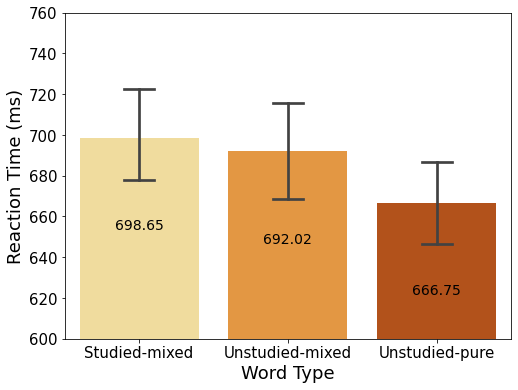

In [28]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df_ANOVA[df_ANOVA['Subject']!=57],
                 x='Word_Type',
                 y='RTc_Outlier',
                 ci=95,
                 capsize=.2,
                 palette='YlOrBr')
plt.xlabel('Word Type', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Reaction Time (ms)', fontsize=18)
plt.yticks(fontsize=15)
plt.ylim(600, 760)

# Display the value of each label inside each bar
plt.bar_label(ax.containers[0], label_type='edge', padding=-95, fmt='%0.2f', size=14)

# Save the plot into a pdf file
plt.savefig('Reaction Time by Word Type.pdf', transparent=True)

<span style="color:black;font-size:17px">
<h4>Result (main effect of 'Word_Type')</h4>

<span style="color:black;font-size:17px">
<summary><span style="background-color:lightgreen">First, when checking the main effect of 'Word_Type', the result reveals</span></summary>

<ul>
    <li> A significant <b>main effect of 'Word_Type'</b>, <em>F</em> (2, 116) = 8.26, <em>p</em> < 0.001, eta_square = 0.125.
         <ul>
            <p><li>This indicates that depending on the type of words participants saw (i.e., Studied-mixed, Unstudied-mixed, Unstudied-pure), their response times to colour changed.</li></p>
            <p><li><b>Paired sample t-tests</b> indicate that 
                <ul>
                    <p><li>Within the Mixed block, there was no signiﬁcant difference between the <b>Studied</b> (M = 698.65 ms SE =15.06) and <b>Unstudied</b> (M = 692.02 ms, SE = 15.82) words (<em>p</em> = 0.85).</li></p>
                    <p><li>However, across the Mixed and Pure blocks, the <b>Unstudied-pure</b> words (M = 666.75 ms, SE = 14.24) signiﬁcantly differed from the <b>Studied-mixed</b> words (<em>p</em> = 0.004), and the <b>Unstudied-mixed</b> words (<em>p</em> = 0.020).</li><p>
                </ul> 
         </ul>

<span style="color:black;font-size:17px">
<h4> Paired Sample t-test - looking into 1st & 2nd half of the Mixed and Pure blocks</h4>
<p>Because the interaction between Word_Type and Trial_2bin was significant, paired sample t-tests were conducted for 1st Half and 2nd Half, respectively, to disclose where the difference occurred.</p>

In [29]:
# 1st Half
df_ANOVA = pd.read_csv('Aggred by Subject, Word_Type, Trial_2bins.csv')
pg.pairwise_tests(data=df_ANOVA[(df_ANOVA['Subject']!=57) & (df_ANOVA['Trial_2bins']=='1st Half')],
                  dv='RTc_Outlier',
                  within=['Word_Type'],
                  subject='Subject',
                  parametric=True,
                  padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Word_Type,Studied-mixed,Unstudied-mixed,True,True,-0.933762,58.0,two-sided,0.354298,1.000000,bonf,0.216,-0.051680
1,Word_Type,Studied-mixed,Unstudied-pure,True,True,3.191565,58.0,two-sided,0.002286,0.006857,bonf,12.874,0.270488
2,Word_Type,Unstudied-mixed,Unstudied-pure,True,True,3.603546,58.0,two-sided,0.000653,0.001958,bonf,39.585,0.299372


In [30]:
# 2nd Half
df_ANOVA = pd.read_csv('Aggred by Subject, Word_Type, Trial_2bins.csv')
pg.pairwise_tests(data=df_ANOVA[(df_ANOVA['Subject']!=57) & (df_ANOVA['Trial_2bins']=='2nd Half')],
                  dv='RTc_Outlier',
                  within=['Word_Type'],
                  subject='Subject',
                  parametric=True,
                  padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Word_Type,Studied-mixed,Unstudied-mixed,True,True,2.006459,58.0,two-sided,0.049477,0.148432,bonf,0.92,0.164056
1,Word_Type,Studied-mixed,Unstudied-pure,True,True,2.644627,58.0,two-sided,0.010504,0.031513,bonf,3.381,0.267559
2,Word_Type,Unstudied-mixed,Unstudied-pure,True,True,1.159170,58.0,two-sided,0.251137,0.753412,bonf,0.269,0.102321


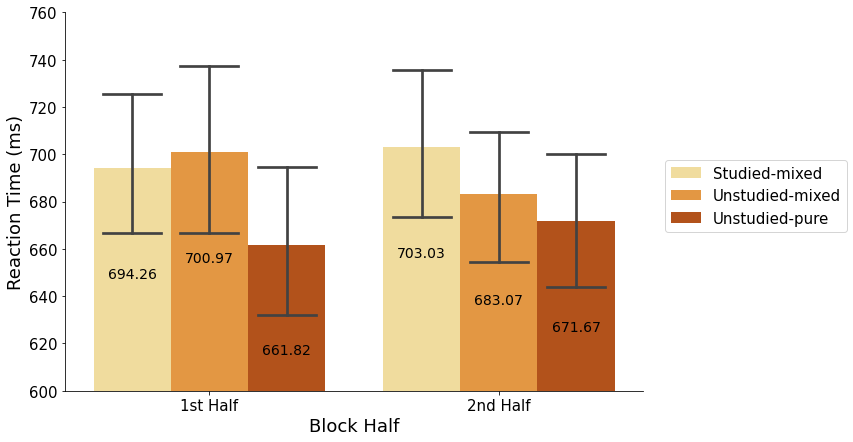

In [31]:
bar = sns.catplot(kind='bar', 
                  data=df_ANOVA[df_ANOVA['Subject']!=57],
                  x='Trial_2bins',
                  y='RTc_Outlier',
                  hue='Word_Type',
                  ci=95,
                  capsize=.2,
                  palette='YlOrBr',
                  height=6, 
                  aspect=1.5)
plt.xlabel('Block Half', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Reaction Time (ms)', fontsize=18)
plt.yticks(fontsize=15)
plt.ylim(600, 760)

# change the location of the legend
sns.move_legend(bar, "center left", bbox_to_anchor=(0.85, 0.55), ncol=1, title=None, frameon=True, fontsize=15)


# Display the value of each label inside each bar
# Extract the matplotlib axes_subplot objects from the FacetGrid
ax = bar.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(value.get_height()):.2f}' for value in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=-113, fmt='%0.2f', size=14)

# Save the plot into a pdf file
plt.savefig('Reaction Time by Word Type and Block Half.pdf', transparent=True)

<span style="color:black;font-size:17px">
<h4> Result (Interaction effect between Word_Type and Trial_2bins)</h4>

<span style="color:black;font-size:17px">
<summary><span style="background-color:lightgreen">Second, further looking into the 1st Half and 2nd Half, the result reveals</span></summary>
<ul>
    <li> A significant <b>2-way interaction between 'Word_Type' and 'Trial_2bins'</b>, <em>F</em> (2, 116) = 3.75, <em>p</em> = 0.03, eta_square = 0.06.</li>
         <ul>
             <p><li>This suggests that not only participants responded to colour in different speed based on the word type they saw, but also they showed different patterns of colour-responding in the 1st half and the 2nd half.</li></p>
             <p><li>Paired sample t-tests for <b>the 1st Half</b> demonstrate that 
                <ul>
                    <p><li>Within the Mixed block, there was no signiﬁcant difference between the <b>Studied</b> (M = 694.26 ms SE =15.38) and <b>Unstudied</b> (M = 700.97 ms, SE = 18.09) words (<em>p</em> = 1.00).</li></p>
                    <p><li>However, across the two blocks, the <b>Unstudied-pure</b> words (M = 661.82 ms, SE = 15.65) signiﬁcantly differed from the <b>Studied-mixed</b> words (<em>p</em> = 0.007), and the <b>Unstudied-mixed</b> words (<em>p</em> = 0.002).</li><p>
                </ul> 
             <p><li>Paired sample t-tests for <b>the 2st Half</b> illustrate that 
                <ul>
                    <p><li>Within the Mixed block, similar to the 1st Half, there was no signiﬁcant difference between the <b>Studied</b> (M = 703.03.26 ms SE =16.44) and <b>Unstudied</b> (M = 683.07 ms, SE = 15.02) words (<em>p</em> = 0.15).</li></p>
                    <p><li>Between the Mixed block and the Pure block, the <b>Unstudied-pure</b> words (M = 671.67 ms, SE = 13.77) signiﬁcantly differed from the <b>Studied-mixed</b> words (<em>p</em> = 0.03). <span style="color:orange">However, the <b>Unstudied-pure</b> words no longer differed from the <b>Unstudied-mixed</b> words (<em>p</em> = 0.75)</span>.</li><p>
                </ul> 
         </ul>

<span style="color:black;font-size:17px">
<h3>6.</h3><h3>Key Findings and Conclusion</h3>

<span style="color:black;font-size:17px">
<p>The <b>main purpose</b> of this research project was to <b>argue that that studying words can slow down the responses to ink colours</b> in the blocked format colour naming task.</p>
<p>My argument was supported by the following <b>key findings</b>:</p>
         <ul>
            <p><li>When checking the RT for <span style="background-color:lightgreen">the entire block (See below Bar chart created in Tableau)</span>:</li></p>
               <ul>
                   <p><li>Within the Mixed block, <b>RT to the Studied words = RT to the Unstudied words</b>, which reproduced MacLeod's findings.</li></p>
                   <p><li>Between the Mixed and Pure blocks, <b>RT to the Mixed block > RT to the baseline Pure block</b>. <span style="background-color:yellow">Importantly, <b>RT to Unstudied-mixed > RT to Unstudied-pure</b>, which indicated <b>the effect of studying words</b></span>.</li></p>
<img src='https://drive.google.com/uc?export=view&id=1RulmOEXR5YwhhrQakIMpWodF9g9SbYGF' width=1000 height=1000></img>
               </ul>
            <p><li>Interestingly, when looking into the RT by breaking down both Mixed and Pure blocks into <span style="background-color:lightgreen">1st half & 2nd half (See below Bar chart created in Tableau)</span>:</li></p>
               <ul>
                   <p><li>The pattern of the 1st half is similar to that of the entire block.</li></p>
                   <p><li>Whereas the pattern of the 2nd half changed where <b>RT to Unstudied-mixed = RT to Unstudied-pure</b>, which suggested <span style="background-color:yellow">a reduced study effect compared to the 1st half.</span></li></p>
<img src='https://drive.google.com/uc?export=view&id=1Ua1m0TtaLegvxCCi2wLMdeUI-pBd3Jev' width=1000 height=1000></img>
               </ul>
         </ul>
<p>In conclusion, this research project provided evidence in support of using Study-Test procedure in the blocked format colour naming task can slow down participants' responses to ink colours.</p>

<p><b>Key takeaway</b>:</p>
<p>The slowdown in colour-responding could be due to 'Task Conflict' between 'Colour naming task' and 'Word reading task'. This is <span style="background-color:yellow">because we are skilled readers in which when we seeing a word, we tend to read the word, which activates 'Word reading task'. This tendency to read word is stronger for recently attended words such as studied words</span>. As a result, because of the study effect, despite participants were asked to ignore words and pay attention to colours, their attention was allocated to attend to the words.</p>